# ndarray学习
https://numpy.org/doc/stable/reference/arrays.ndarray.html

ndarray是具有相同类型和大小的项目的（通常为固定大小）多维容器。 数组中维度和项目的数量由其形状定义，形状是N个非负整数的元组，用于指定每个维度的大小。
数组中项目的类型由单独的数据类型对象（dtype）指定，其中一个与每个ndarray相关联。

与Python中的其他容器对象一样，可以通过对数组进行索引或切片（例如使用N个整数）以及通过ndarray的方法和属性来访问和修改ndarray的内容。

不同的ndarray可以共享相同的数据，因此在一个ndarray中所做的更改可能在另一个中可见。
也就是说，一个ndarray可以是另一个ndarray的“view”，并且它所引用的数据由“base” ndarray处理。
ndarrays也可以是实现缓冲区或数组接口的Python字符串或对象所拥有的内存的视图。

In [1]:
import numpy as np


## ndarray的构造函数
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray
```
class numpy.ndarray(shape, dtype=float, buffer=None, offset=0, strides=None, order=None)

Parameters(for the __new__ method; see Notes below)

shape: tuple of ints
Shape of created array.

dtype: data-type, optional
Any object that can be interpreted as a numpy data type.

buffer: object exposing buffer interface, optional
Used to fill the array with data.

offset: int, optional
Offset of array data in buffer.

strides: tuple of ints, optional
Strides of data in memory.

order: {‘C’, ‘F’}, optional
Row-major (C-style) or column-major (Fortran-style) order.
```

In [2]:
a = np.ndarray((2,3))
a

array([[0., 0., 0.],
       [0., 0., 0.]])

## ndarray的创建方式
https://numpy.org/doc/stable/reference/routines.array-creation.html#routines-array-creation

### Ones and zeros

In [3]:
"""
numpy.empty(shape, dtype=float, order='C')
依据给定形状和类型(shape[, dtype, order])返回一个新的空数组
参数：shape : 整数或者整型元组定义返回数组的形状；
    dtype : 数据类型，可选定义返回数组的类型。
    order : {‘C’, ‘F’}, 可选规定返回数组元素在内存的存储顺序：C（C语言）-rowmajor；F（Fortran）column-major。

"""
np.empty((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [4]:
# numpy.empty_like(prototype, dtype=None, order='K', subok=True, shape=None)
# np.empty_like创建一个新的和原来array形状一样的，但是未初始化的array
a=np.array([[1.,2.,3.],[4.,5.,6.]])
np.empty_like(a)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
# numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')

# 返回一个2-D数组，对角线上是1，其他地方是0。
np.eye(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [6]:
np.eye(3, dtype=int,k=-2)
# k 对角线索引:0(默认)表示主对角线，正值表示上对角线，负值表示下对角线。

array([[0, 0, 0],
       [0, 0, 0],
       [1, 0, 0]])

In [7]:
# 单位阵是一个正方形阵，主对角线上有1个单位阵。
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
# numpy.ones(shape, dtype=None, order='C')¶
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [9]:
# numpy.ones_like(a, dtype=None, order='K', subok=True, shape=None)
np.ones([1,2])


array([[1., 1.]])

In [10]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [11]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [12]:
np.full((2, 2), 10)

array([[10, 10],
       [10, 10]])

In [13]:
np.full_like([2,3], 0.1, dtype=np.double)

array([0.1, 0.1])

### 从现有数据创建ndarray
重点numpy.array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array


In [14]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

In [15]:
# 最小二维
np.array([1, 2, 3], ndmin=2)

array([[1, 2, 3]])

In [16]:
np.array(np.mat('1 2; 3 4'))

array([[1, 2],
       [3, 4]])

In [17]:
# subok ： 如果为True，则子类将被传递，否则返回的数组将被强制为基类数组（默认）。
np.array(np.mat('1 2; 3 4'), subok=True)


matrix([[1, 2],
        [3, 4]])

In [18]:
# 数据类型包含多个元素
x = np.array([(1,2),(3,4)],dtype=[('a','<i4'),('b','<i4')])
x

array([(1, 2), (3, 4)], dtype=[('a', '<i4'), ('b', '<i4')])

In [19]:
x['a']

array([1, 3])

In [20]:
# asarray
np.asarray([1,2])

array([1, 2])

In [21]:
# asanyarray 将输入转换为ndarray，但通过ndarray子类。
np.asanyarray([1,2])

array([1, 2])

In [22]:
# np.recarray 是记录数组
issubclass(np.recarray, np.ndarray)

True

In [23]:
a = np.array([(1.0, 2), (3.0, 4)], dtype='f4,i4').view(np.recarray)
np.asarray(a) is a

False

In [24]:
np.asanyarray(a) is a

True

In [25]:
x = np.array([(1.0, 2), (3.0, 4)], order="F")
x.flags['C_CONTIGUOUS']

False

In [26]:
x1 = np.ascontiguousarray(x, dtype=np.float32)
x1

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [27]:
x1.flags['C_CONTIGUOUS']



True

In [28]:
# 矩阵
x = np.array([[1, 2], [3, 4]])
m = np.asmatrix(x)
x[0,0] = 5
m

matrix([[5, 2],
        [3, 4]])

In [29]:
# copy
x = np.array([1, 2, 3])
y = x
z = np.copy(x)
x[0] = 10
x[0] == y[0],x[0] == z[0]


(True, False)

In [30]:
# frombuffer 将缓冲区解释为一维数组。
s = b'hello world'
np.frombuffer(s, dtype='S1', count=5, offset=6),np.frombuffer(b'\x01\x02\x03\x04\x05', dtype=np.uint8, count=3)


(array([b'w', b'o', b'r', b'l', b'd'], dtype='|S1'),
 array([1, 2, 3], dtype=uint8))

In [31]:
# fromfile 从文本或二进制文件中的数据构造一个数组。
dt = np.dtype([('time', [('min', np.int64), ('sec', np.int64)]),
               ('temp', float)])
x = np.zeros((1,), dtype=dt)
x['time']['min'] = 10; x['temp'] = 98.25
x


array([((10, 0), 98.25)],
      dtype=[('time', [('min', '<i8'), ('sec', '<i8')]), ('temp', '<f8')])

In [32]:
import tempfile
fname = tempfile.mkstemp()[1]
x.tofile(fname)

np.fromfile(fname, dtype=dt)

array([((10, 0), 98.25)],
      dtype=[('time', [('min', '<i8'), ('sec', '<i8')]), ('temp', '<f8')])

In [33]:
np.save(fname, x)
np.load(fname + '.npy')



array([((10, 0), 98.25)],
      dtype=[('time', [('min', '<i8'), ('sec', '<i8')]), ('temp', '<f8')])

In [34]:
# fromfunction 通过在每个坐标上执行一个函数来构造一个数组。因此，所得数组在坐标（x，y，z）处具有值fn（x，y，z）。

np.fromfunction(lambda i, j: i + j, (3, 3), dtype=int)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [35]:
# fromiter 从一个迭代对象创建一个新的一维数组。
iterable = (x*x for x in range(5))
np.fromiter(iterable, float)

array([ 0.,  1.,  4.,  9., 16.])

In [36]:
# fromstring 从字符串中的文本数据初始化的新一维数组。
np.fromstring('1 2', dtype=int, sep=' '),np.fromstring('1, 2', dtype=int, sep=',')

(array([1, 2]), array([1, 2]))

In [37]:
# numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
# https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html#numpy.loadtxt
from io import StringIO   # StringIO behaves like a file object
c = StringIO(u"0 1\n2 3")
np.loadtxt(c)

array([[0., 1.],
       [2., 3.]])

In [38]:
d = StringIO(u"M 21 72\nF 35 58")
np.loadtxt(d, dtype={'names': ('gender', 'age', 'weight'),
                     'formats': ('S1', 'i4', 'f4')})



array([(b'M', 21, 72.), (b'F', 35, 58.)],
      dtype=[('gender', 'S1'), ('age', '<i4'), ('weight', '<f4')])

In [39]:
c = StringIO(u"1,0,2\n3,0,4")
x, y = np.loadtxt(c, delimiter=',', usecols=(0, 2), unpack=True)
x,y


(array([1., 3.]), array([2., 4.]))

In [40]:
# fromregex 使用正则表达式解析从文本文件构造一个数组。
# https://numpy.org/doc/stable/reference/generated/numpy.fromregex.html#numpy.fromregex
f = open('test.dat', 'w')
_ = f.write("1312 foo\n1534  bar\n444   qux")
f.close()

regexp = r"(\d+)\s+(...)"  # match [digits, whitespace, anything]
output = np.fromregex('test.dat', regexp,
                      [('num', np.int64), ('key', 'S3')])
output,output['num']

(array([(1312, b'foo'), (1534, b'bar'), ( 444, b'qux')],
       dtype=[('num', '<i8'), ('key', 'S3')]),
 array([1312, 1534,  444], dtype=int64))

In [41]:
# numpy.genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+, -./:;<=>?@[\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')

s = StringIO(u"1,1.3,abcde")
data = np.genfromtxt(s, dtype=[('myint','i8'),('myfloat','f8'),
('mystring','S5')], delimiter=",")
data

array((1, 1.3, b'abcde'),
      dtype=[('myint', '<i8'), ('myfloat', '<f8'), ('mystring', 'S5')])

#### Creating record arrays (numpy.rec)

https://numpy.org/doc/stable/reference/routines.array-creation.html#creating-record-arrays-numpy-rec

numpy记录数组.
```

# 记录数组 和结构体数组类似，在元素访问方式上面有所区别  :
    结构数组     students['age']     students[1]['age']
    记录数组     students.age        students[1].age

====================================================================
1.创建记录数组（numpy.rec）
# 注意numpy.rec是首选别名 numpy.core.records。
core.records.array（obj [，dtype，shape，...]）     #从各种各样的对象构造一个记录数组。
core.records.fromarrays（arrayList [，dtype，...]） #从（平面）数组列表创建一个记录数组
core.records.fromrecords（recList [，dtype，...]）  #以文本形式从记录列表中创建一个recarray
core.records.fromstring（datastring [，dtype，...]）#从包含在字符串中的二进制数据创建（只读）记录数组
core.records.fromfile（fd [，dtype，shape，...]）    #从二进制文件数据创建一个数组

=====================================================================
2.记录数组 #属性访问结构化数组的字段

2.1.创建记录数组：
recordarr = np.rec.array([(1,2.,'Hello'),(3,4.,"World")],dtype=[('a', 'i4'),('b', 'f4'), ('c', 'S10')])
    # rec.array([(1, 2., b'Hello'), (3, 4., b'World')],dtype=[('a', '<i4'), ('b', '<f4'), ('c', 'S10')])
type(recordarr.a)# numpy.recarray

======================================================================
2.2.数组操作：
recordarr.b       #array([2., 4.], dtype=float32)
recordarr[1:2]   # rec.array([(3, 4., 'World')],dtype=[('a', '<i4'), ('b', '<f4'), ('c', 'S10')])
recordarr[1:2].a# array([3], dtype=int32)
recordarr.a[1:2]# array([3], dtype=int32)
recordarr[1].c   # 'World'

======================================================================
2.2.numpy.rec.array 数组（包括结构化）转换为记录数组

arr = array([(1,2.,'Hello'),(3,4.,"World")],dtype=[('a', 'i4'), ('b', 'f4'), ('c', 'S10')])

recordarr = np.rec.array(arr)
# 视图获得结构化数组的记录数组：
recordarr = arr.view(dtype=np.dtype((np.record, arr.dtype)),type=np.recarray)
    # rec.array([(1, 2., b'Hello'), (3, 4., b'World')],dtype=[('a', '<i4'), ('b', '<f4'), ('c', 'S10')])

recordarr = arr.view(np.recarray) #将ndarray作为类型查看np.recarray会自动转换为np.record数据类型
recordarr.dtype                            # dtype((numpy.record, [('a', '<i4'), ('b', '<f4'), ('c', 'S10')]))

=====================================================================
 2.3.要回到纯粹的ndarray中，dtype和type都必须重置：
arr2 = recordarr.view(recordarr.dtype.fields or recordarr.dtype, np.ndarray)
    # array([(1, 2., b'Hello'), (3, 4., b'World')],dtype=[('a', '<i4'), ('b', '<f4'), ('c', 'S10')])
=====================================================================
```

#### Creating character arrays (numpy.char)
https://numpy.org/doc/stable/reference/routines.array-creation.html#creating-character-arrays-numpy-char
numpy.char是numpy.core.defchararray的首选别名。

#### Numerical ranges
numpy.arange([start, ]stop, [step, ]dtype=None)


In [42]:
np.arange(3,7),np.arange(3,7,2)



(array([3, 4, 5, 6]), array([3, 5]))

In [43]:
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
np.linspace(2.0, 3.0, num=5),\
np.linspace(2.0, 3.0, num=5, endpoint=False),\
np.linspace(2.0, 3.0, num=5, retstep=True)

# retstep 如果为真，返回(样本，步长)，其中步长是样本之间的间隔。

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]),
 array([2. , 2.2, 2.4, 2.6, 2.8]),
 (array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25))

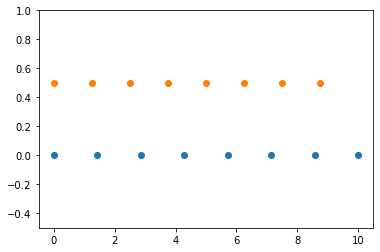

In [44]:
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')

plt.plot(x2, y + 0.5, 'o')

plt.ylim([-0.5, 1])

plt.show()



In [45]:
"""
numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)
返回以对数刻度均匀间隔的数字。
在线性空间中，序列以base ** start (base的开始次方)开始，以base ** stop(参见下面的端点)结束。
版本1.16.0中的更改:现在支持非标量启动和停止。
"""
np.logspace(2.0, 3.0, num=4),\
np.logspace(2.0, 3.0, num=4, endpoint=False),\
np.logspace(2.0, 3.0, num=4, base=2.0)


(array([ 100.        ,  215.443469  ,  464.15888336, 1000.        ]),
 array([100.        , 177.827941  , 316.22776602, 562.34132519]),
 array([4.        , 5.0396842 , 6.34960421, 8.        ]))

In [46]:
"""
numpy.geomspace(start, stop, num=50, endpoint=True, dtype=None, axis=0)
返回在对数尺度上均匀间隔的数字(几何级数)。这类似于logspace，但是直接指定了端点。
每个输出示例都是前一个输出的常数倍。
版本1.16.0中的更改:现在支持非标量启动和停止。
Straight line np.geomspace(1j, 1000j, num=4)
Circle  np.geomspace(-1+0j, 1+0j, num=5)
"""

np.geomspace(1, 1000, num=4),\
np.geomspace(1, 1000, num=3, endpoint=False),\
np.geomspace(1, 1000, num=4, endpoint=False),\
np.geomspace(1, 256, num=9)

(array([   1.,   10.,  100., 1000.]),
 array([  1.,  10., 100.]),
 array([  1.        ,   5.62341325,  31.6227766 , 177.827941  ]),
 array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256.]))

In [47]:
# 注意，上面可能不会产生精确整数
np.geomspace(1, 256, num=9, dtype=int),\
np.around(np.geomspace(1, 256, num=9)).astype(int)


(array([  1,   2,   4,   7,  16,  32,  63, 127, 256]),
 array([  1,   2,   4,   8,  16,  32,  64, 128, 256]))

In [48]:
# 允许负的、递减的和复杂的输入
np.geomspace(1000, 1, num=4),\
np.geomspace(-1000, -1, num=4),\
np.geomspace(1j, 1000j, num=4),\
np.geomspace(-1+0j, 1+0j, num=5)
"""
np.geomspace(1j, 1000j, num=4)  # 直线
np.geomspace(-1+0j, 1+0j, num=5)  # 圆
"""

'\nnp.geomspace(1j, 1000j, num=4)  # 直线\nnp.geomspace(-1+0j, 1+0j, num=5)  # 圆\n'

In [49]:
"""
从坐标向量返回坐标矩阵。
给定一维坐标数组x1、x2、…、xn，在N-D网格上建立N-D坐标数组，对N-D标量/向量场进行向量化计算。
在1.9版本中进行了更改:允许使用1-D和0-D的情况。
"""

nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
# sparse 如果为真，则返回一个稀疏网格以保存内存。默认是假的。新版本1.7.0。
np.meshgrid(x, y),np.meshgrid(x, y, sparse=True)

([array([[0. , 0.5, 1. ],
         [0. , 0.5, 1. ]]),
  array([[0., 0., 0.],
         [1., 1., 1.]])],
 [array([[0. , 0.5, 1. ]]),
  array([[0.],
         [1.]])])

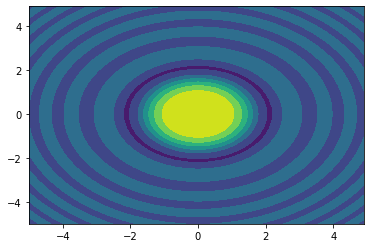

In [50]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.show()



In [51]:
"""
nd_grid实例，它返回一个密集的多维“ meshgrid”。

numpy.lib.index_tricks.nd_grid的一个实例，该实例在建立索引时返回一个密集的（或充血的）网格网格，
以便每个返回的参数具有相同的形状。 输出数组的尺寸和数量等于索引尺寸的数量。 如果步长不是复数，
则停止不包括在内。

但是，如果步长是复数（例如5j），则其幅度的整数部分将被解释为指定要在起始值和终止值之间创建的点数，
其中终止值是包含端点的值。
"""
np.mgrid[0:5,0:5],np.mgrid[-1:1:5j]


(array([[[0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1],
         [2, 2, 2, 2, 2],
         [3, 3, 3, 3, 3],
         [4, 4, 4, 4, 4]],
 
        [[0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4]]]),
 array([-1. , -0.5,  0. ,  0.5,  1. ]))

In [52]:
"""
nd_grid实例，它返回一个开放的多维meshgrid。

numpy.lib.index_tricks.nd_grid的一个实例，该实例在建立索引时返回一个开放的（即未充实的）网格，
因此每个返回数组的一个维数都大于1。输出数组的维数和数量相等 到索引尺寸的数量。
如果步长不是复数，则停止不包括在内。

但是，如果步长是复数（例如5j），则其幅度的整数部分将被解释为指定要在起始值和终止值之间创建的点数，
其中终止值是包含端点的值。
"""
np.ogrid[-1:1:5j],np.ogrid[0:5,0:5]

(array([-1. , -0.5,  0. ,  0.5,  1. ]),
 [array([[0],
         [1],
         [2],
         [3],
         [4]]),
  array([[0, 1, 2, 3, 4]])])

#### 矩阵

In [54]:
# 提取对角线或构造对角线数组
x = np.arange(9).reshape((3,3))
x


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [55]:
np.diag(x),\
np.diag(x, k=1),\
np.diag(x, k=-1)



(array([0, 4, 8]), array([1, 5]), array([3, 7]))

In [56]:
np.diag(np.diag(x))



array([[0, 0, 0],
       [0, 4, 0],
       [0, 0, 8]])

In [57]:
# 创建一个二维数组，将扁平输入作为对角线。
np.diagflat([[1,2], [3,4]]),np.diagflat([1,2], 1)


(array([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]]),
 array([[0, 1, 0],
        [0, 0, 2],
        [0, 0, 0]]))

In [58]:
# 在给定对角线处及以下且在其他位置为零的数组。
# k 数组被填充的位置和位置以下的次对角线。k = 0是主对角线，k < 0在它下面，k>在上面。默认值是0。
np.tri(3, 5, 2, dtype=int),np.tri(3, 5, -1)


(array([[1, 1, 1, 0, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.]]))

In [59]:
# 数组的下三角。
np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)


array([[ 0,  0,  0],
       [ 4,  0,  0],
       [ 7,  8,  0],
       [10, 11, 12]])

In [60]:
# 数组的上三角。
np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 0,  8,  9],
       [ 0,  0, 12]])

In [61]:
"""
生成一个范德蒙矩阵。

输出矩阵的列是输入向量的幂。幂的顺序由递增的布尔参数决定。
具体地说，当递增为False时，第i输出列是输入向量按元素顺序的N - i- 1次幂。
这样一个每一行都有一个几何级数的矩阵，以亚历山大·特拉夫·范德蒙德的名字命名。
"""
x = np.array([1, 2, 3, 5])
N = 3 # 列数 默认len(x)
np.vander(x, N)

array([[ 1,  1,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [25,  5,  1]])

In [62]:
np.column_stack([x**(N-1-i) for i in range(N)])



array([[ 1,  1,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [25,  5,  1]], dtype=int32)

In [63]:
np.vander(x),np.vander(x, increasing=True)



(array([[  1,   1,   1,   1],
        [  8,   4,   2,   1],
        [ 27,   9,   3,   1],
        [125,  25,   5,   1]]),
 array([[  1,   1,   1,   1],
        [  1,   2,   4,   8],
        [  1,   3,   9,  27],
        [  1,   5,  25, 125]]))

In [64]:
np.linalg.det(np.vander(x)),(5-3)*(5-2)*(5-1)*(3-2)*(3-1)*(2-1)



(48.00000000000003, 48)

In [65]:
# 把输入解释成一个矩阵。
x = np.array([[1, 2], [3, 4]])
m = np.asmatrix(x)
x[0,0] = 5
m

matrix([[5, 2],
        [3, 4]])

In [66]:
# 从字符串、嵌套序列或数组构建矩阵对象。
A = np.mat('1 1; 1 1')
B = np.mat('2 2; 2 2')
C = np.mat('3 4; 5 6')
D = np.mat('7 8; 9 0')
np.bmat([[A, B], [C, D]]),\
np.bmat(np.r_[np.c_[A, B], np.c_[C, D]]),\
np.bmat('A,B; C,D')

(matrix([[1, 1, 2, 2],
         [1, 1, 2, 2],
         [3, 4, 7, 8],
         [5, 6, 9, 0]]),
 matrix([[1, 1, 2, 2],
         [1, 1, 2, 2],
         [3, 4, 7, 8],
         [5, 6, 9, 0]]),
 matrix([[1, 1, 2, 2],
         [1, 1, 2, 2],
         [3, 4, 7, 8],
         [5, 6, 9, 0]]))